In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [0]:
training_set = dataset_train.iloc[:, 1:2].values

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
X_train = []
y_train = []
for i in range(60, 1258):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(rate=0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(rate=0.2))
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [19]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
1198/1198 [==============================] - 17s 14ms/step - loss: 0.0364
Epoch 2/100
1198/1198 [==============================] - 15s 12ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0055
Epoch 4/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0047
Epoch 8/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0048
Epoch 10/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 14s 12ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [============================

In [0]:
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [0]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [0]:
inputs = inputs.reshape(-1, 1)

In [0]:
inputs = sc.transform(inputs)

In [0]:
X_test = []
for i in range(60, 80):
  X_test.append(inputs[i-60:i, 0])
  
X_test = np.array(X_test)

In [0]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
predicted_stock_price = regressor.predict(X_test)

In [0]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

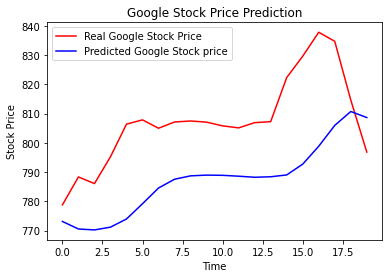

In [35]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [0]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [38]:
rmse

23.193047852874738